# *Contents*
______________________________

## 1. Data import
## 2. Preprocessing Steps
###   - Filling Null Values
## 3. KMeans Cluster Method
## 4. Hierarchial Method
## 5. Modelling
###   - Model Building
###   - One Versus One Classifier

_________________________________________

# Data Import

In [52]:
# For Preprocessing part
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# For clustering methods
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

# For modelling part
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.multiclass import OneVsOneClassifier

In [29]:
data = pd.read_csv('cluster.csv')
data_initial = data.copy()

In [30]:
data

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [31]:
data.describe(include = 'all')

CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count     8950   8950.000000        8950.000000   8950.000000   
unique    8950           NaN                NaN           NaN   
top     C10001           NaN                NaN           NaN   
freq         1           NaN                NaN           NaN   
mean       NaN   1564.474828           0.877271   1003.204834   
std        NaN   2081.531879           0.236904   2136.634782   
min        NaN      0.000000           0.000000      0.000000   
25%        NaN    128.281915           0.888889     39.635000   
50%        NaN    873.385231           1.000000    361.280000   
75%        NaN   2054.140036           1.000000   1110.130000   
max        NaN  19043.138560           1.000000  49039.570000   

        ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count        8950.000000             8950.000000   8950.000000   
unique               NaN                     NaN           NaN   
top                  NaN                     NaN           NaN   
freq                 NaN                     NaN           NaN   
mean          592.437371              411.067645    978.871112   
std          1659.887917              904.338115   2097.163877   
min             0.000000                0.000000      0.000000   
25%             0.000000                0.000000      0.000000   
50%            38.000000               89.000000      0.000000   
75%           577.405000              468.637500   1113.821139   
max         40761.250000            22500.000000  47137.211760   

        PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count           8950.000000                 8950.000000   
unique                  NaN                         NaN   
top                     NaN                         NaN   
freq                    NaN                         NaN   
mean               0.490351                    0.202458   
std                0.401371                    0.298336   
min                0.000000                    0.000000   
25%                0.083333                    0.000000   
50%                0.500000                    0.083333   
75%                0.916667                    0.300000   
max                1.000000                    1.000000   

        PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                        8950.000000             8950.000000   
unique                               NaN                     NaN   
top                                  NaN                     NaN   
freq                                 NaN                     NaN   
mean                            0.364437                0.135144   
std                             0.397448                0.200121   
min                             0.000000                0.000000   
25%                             0.000000                0.000000   
50%                             0.166667                0.000000   
75%                             0.750000                0.222222   
max                             1.000000                1.500000   

        CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
count        8950.000000    8950.000000   8949.000000   8950.000000   
unique               NaN            NaN           NaN           NaN   
top                  NaN            NaN           NaN           NaN   
freq                 NaN            NaN           NaN           NaN   
mean            3.248827      14.709832   4494.449450   1733.143852   
std             6.824647      24.857649   3638.815725   2895.063757   
min             0.000000       0.000000     50.000000      0.000000   
25%             0.000000       1.000000   1600.000000    383.276166   
50%             0.000000       7.000000   3000.000000    856.901546   
75%             4.000000      17.000000   6500.000000   1901.134317   
max           123.000000     358.000000  30000.000000  50721.483360   

        MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENUR

# Preprocessing

## Filling Null Values

In [32]:
data.drop(columns = ['CUST_ID'], inplace = True)

In [33]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [34]:
# filling null values with its median
for column in data.columns:
    if data[column].dtypes != object:
        data[column].fillna(data[column].median(), inplace = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9668\324860159.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace = True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9668\324860159.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

# KMeans Cluster Method

In [35]:
x = data
wcss = []
silhouette_scores = []

for i in range(2,7):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)

    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

    y = kmeans.fit_predict(x)
    silhouette_avg = silhouette_score(x, y)
    silhouette_scores.append(silhouette_avg)

    wcss_str = '{:.40f}'.format(wcss_iter)
    print(f"Cluster {i}: WCSS = {wcss_str}, Silhouette Score = {silhouette_avg}")

Cluster 2: WCSS = 279341358291.3112792968750000000000000000000000000000, Silhouette Score = 0.5146079077281864
Cluster 3: WCSS = 232838823948.6281127929687500000000000000000000000000, Silhouette Score = 0.46530658558502996
Cluster 4: WCSS = 206916504297.5594482421875000000000000000000000000000, Silhouette Score = 0.397868026198
Cluster 5: WCSS = 186583544077.9881591796875000000000000000000000000000, Silhouette Score = 0.40589289672481177
Cluster 6: WCSS = 164208289986.0378723144531250000000000000000000000000, Silhouette Score = 0.3970311053819534


Text(0, 0.5, 'Within-cluster Sum of Squares')

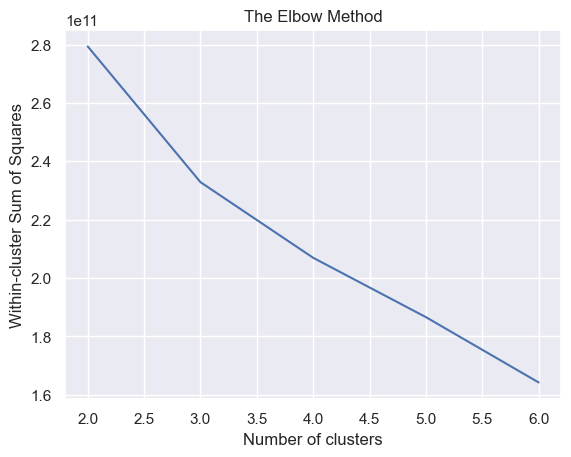

In [36]:
number_clusters = range(2,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [37]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [38]:
y = kmeans.fit_predict(x)
silhouette_score(x, y)

0.46530658558502996

In [39]:
data_initial['Cluster'] = y
data_initial

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0      201.802084        139.509787          0.000000      12        0  
1     4103.032597       1072.340217          0.222222      12        2  
2      622.066742        627.284787          0.000000      12        2  
3        0.000000               NaN          0.000000      12        2  
4      678.334763        244.791237          0.000000      12        0  
...           ...               ...            

 # Hierarchial Clustering

In [40]:
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns = data.columns)
data_scaled

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     0.039353           0.000787   0.091790          0.000000   
1     0.293876           0.000083   0.000000          0.000000   
2     0.310798           0.000125   0.096307          0.096307   
3     0.208886           0.000080   0.187872          0.187872   
4     0.504284           0.000617   0.009867          0.009867   
...        ...                ...        ...               ...   
8945  0.025197           0.000884   0.257438          0.000000   
8946  0.016485           0.000859   0.257808          0.000000   
8947  0.022773           0.000811   0.140538          0.000000   
8948  0.026524           0.001642   0.000000          0.000000   
8949  0.186405           0.000333   0.546776          0.546776   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.091790      0.000000             0.000160   
1                   0.000000      0.591240             0.000000   
2                   0.000000      0.000000             0.000125   
3                   0.000000      0.025792             0.000010   
4                   0.000000      0.000000             0.000051   
...                      ...           ...                  ...   
8945                0.257438      0.000000             0.000884   
8946                0.257808      0.000000             0.000859   
8947                0.140538      0.000000             0.000811   
8948                0.000000      0.072055             0.000000   
8949                0.000000      0.063538             0.000333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.000080   
1                       0.000000                          0.000000   
2                       0.000125                          0.000000   
3                       0.000010                          0.000000   
4                       0.000051                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.000737   
8946                    0.000000                          0.000716   
8947                    0.000000                          0.000649   
8948                    0.000000                          0.000000   
8949                    0.000333                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000          0.000000       0.001924      0.962156   
1                   0.000023          0.000367       0.000000      0.642358   
2                   0.000000          0.000000       0.001495      0.934206   
3                   0.000010          0.000125       0.000125      0.939987   
4                   0.000000          0.000000       0.000617      0.740040   
...                      ...               ...            ...           ...   
8945                0.000000          0.000000       0.005306      0.884301   
8946                0.000000          0.000000       0.005156      0.859359   
8947                0.000000          0.000000       0.004866      0.973257   
8948                0.000328          0.003942       0.000000      0.985466   
8949                0.000167          0.001000       0.011503      0.600165   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0     0.194165          0.134230          0.000000  0.011546  
1     0.376516          0.098404          0.000020  0.001101  
2     0.077485          0.078135          0.000000  0.001495  
3     0.000000          0.039147          0.000000  0.001504  
4     0.418329          0.150963          0.000000  0.007400  
...        ...               ...               ...       ...  
8945  0.287924          0.043230          0.000442  0.005306  
8946  0.237064          0.268415          0.000000  0.005156  
8947  0.079097          0.080214          0.000243  

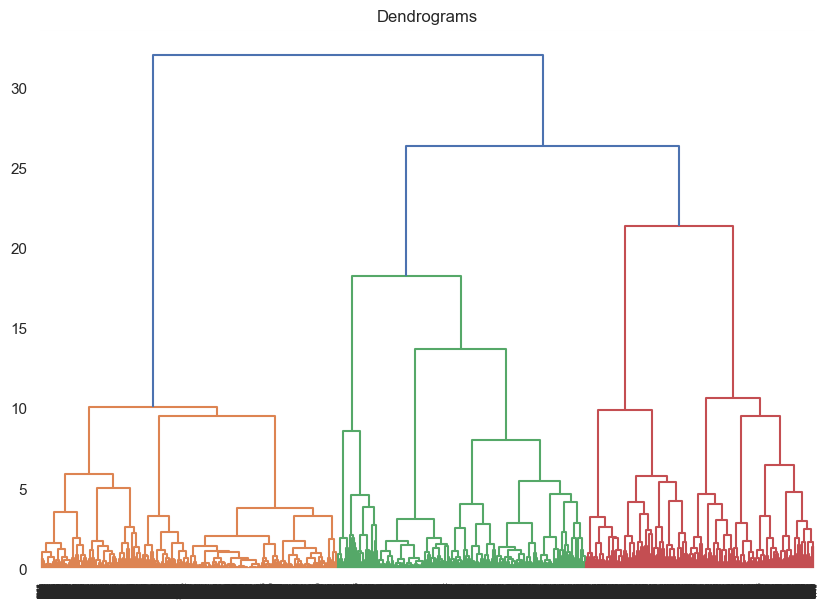

In [26]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

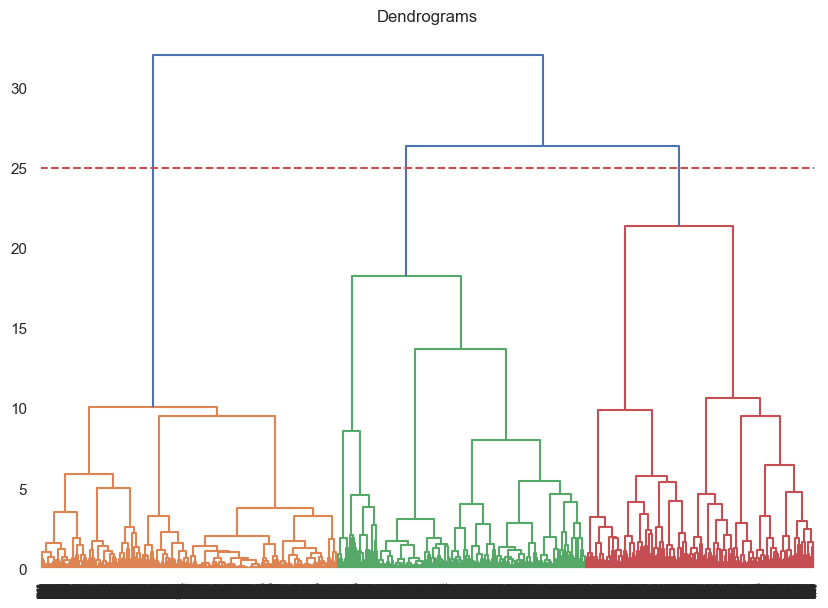

In [27]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=25, color='r', linestyle='--')

In [41]:
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')  
y = cluster.fit_predict(data_scaled)

In [42]:
silhouette_avg = silhouette_score(data_scaled, y)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.28591994142808386


In [43]:
data['cluster'] = y
data

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12        1  
1     4103.032597       1072.340217          0.222222      12        0  
2      622.066742        627.284787          0.000000      12        1  
3        0.000000        312.343947          0.000000      12        1  
4      678.334763        244.791237          0.000000      12        2  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000       6        1  
89

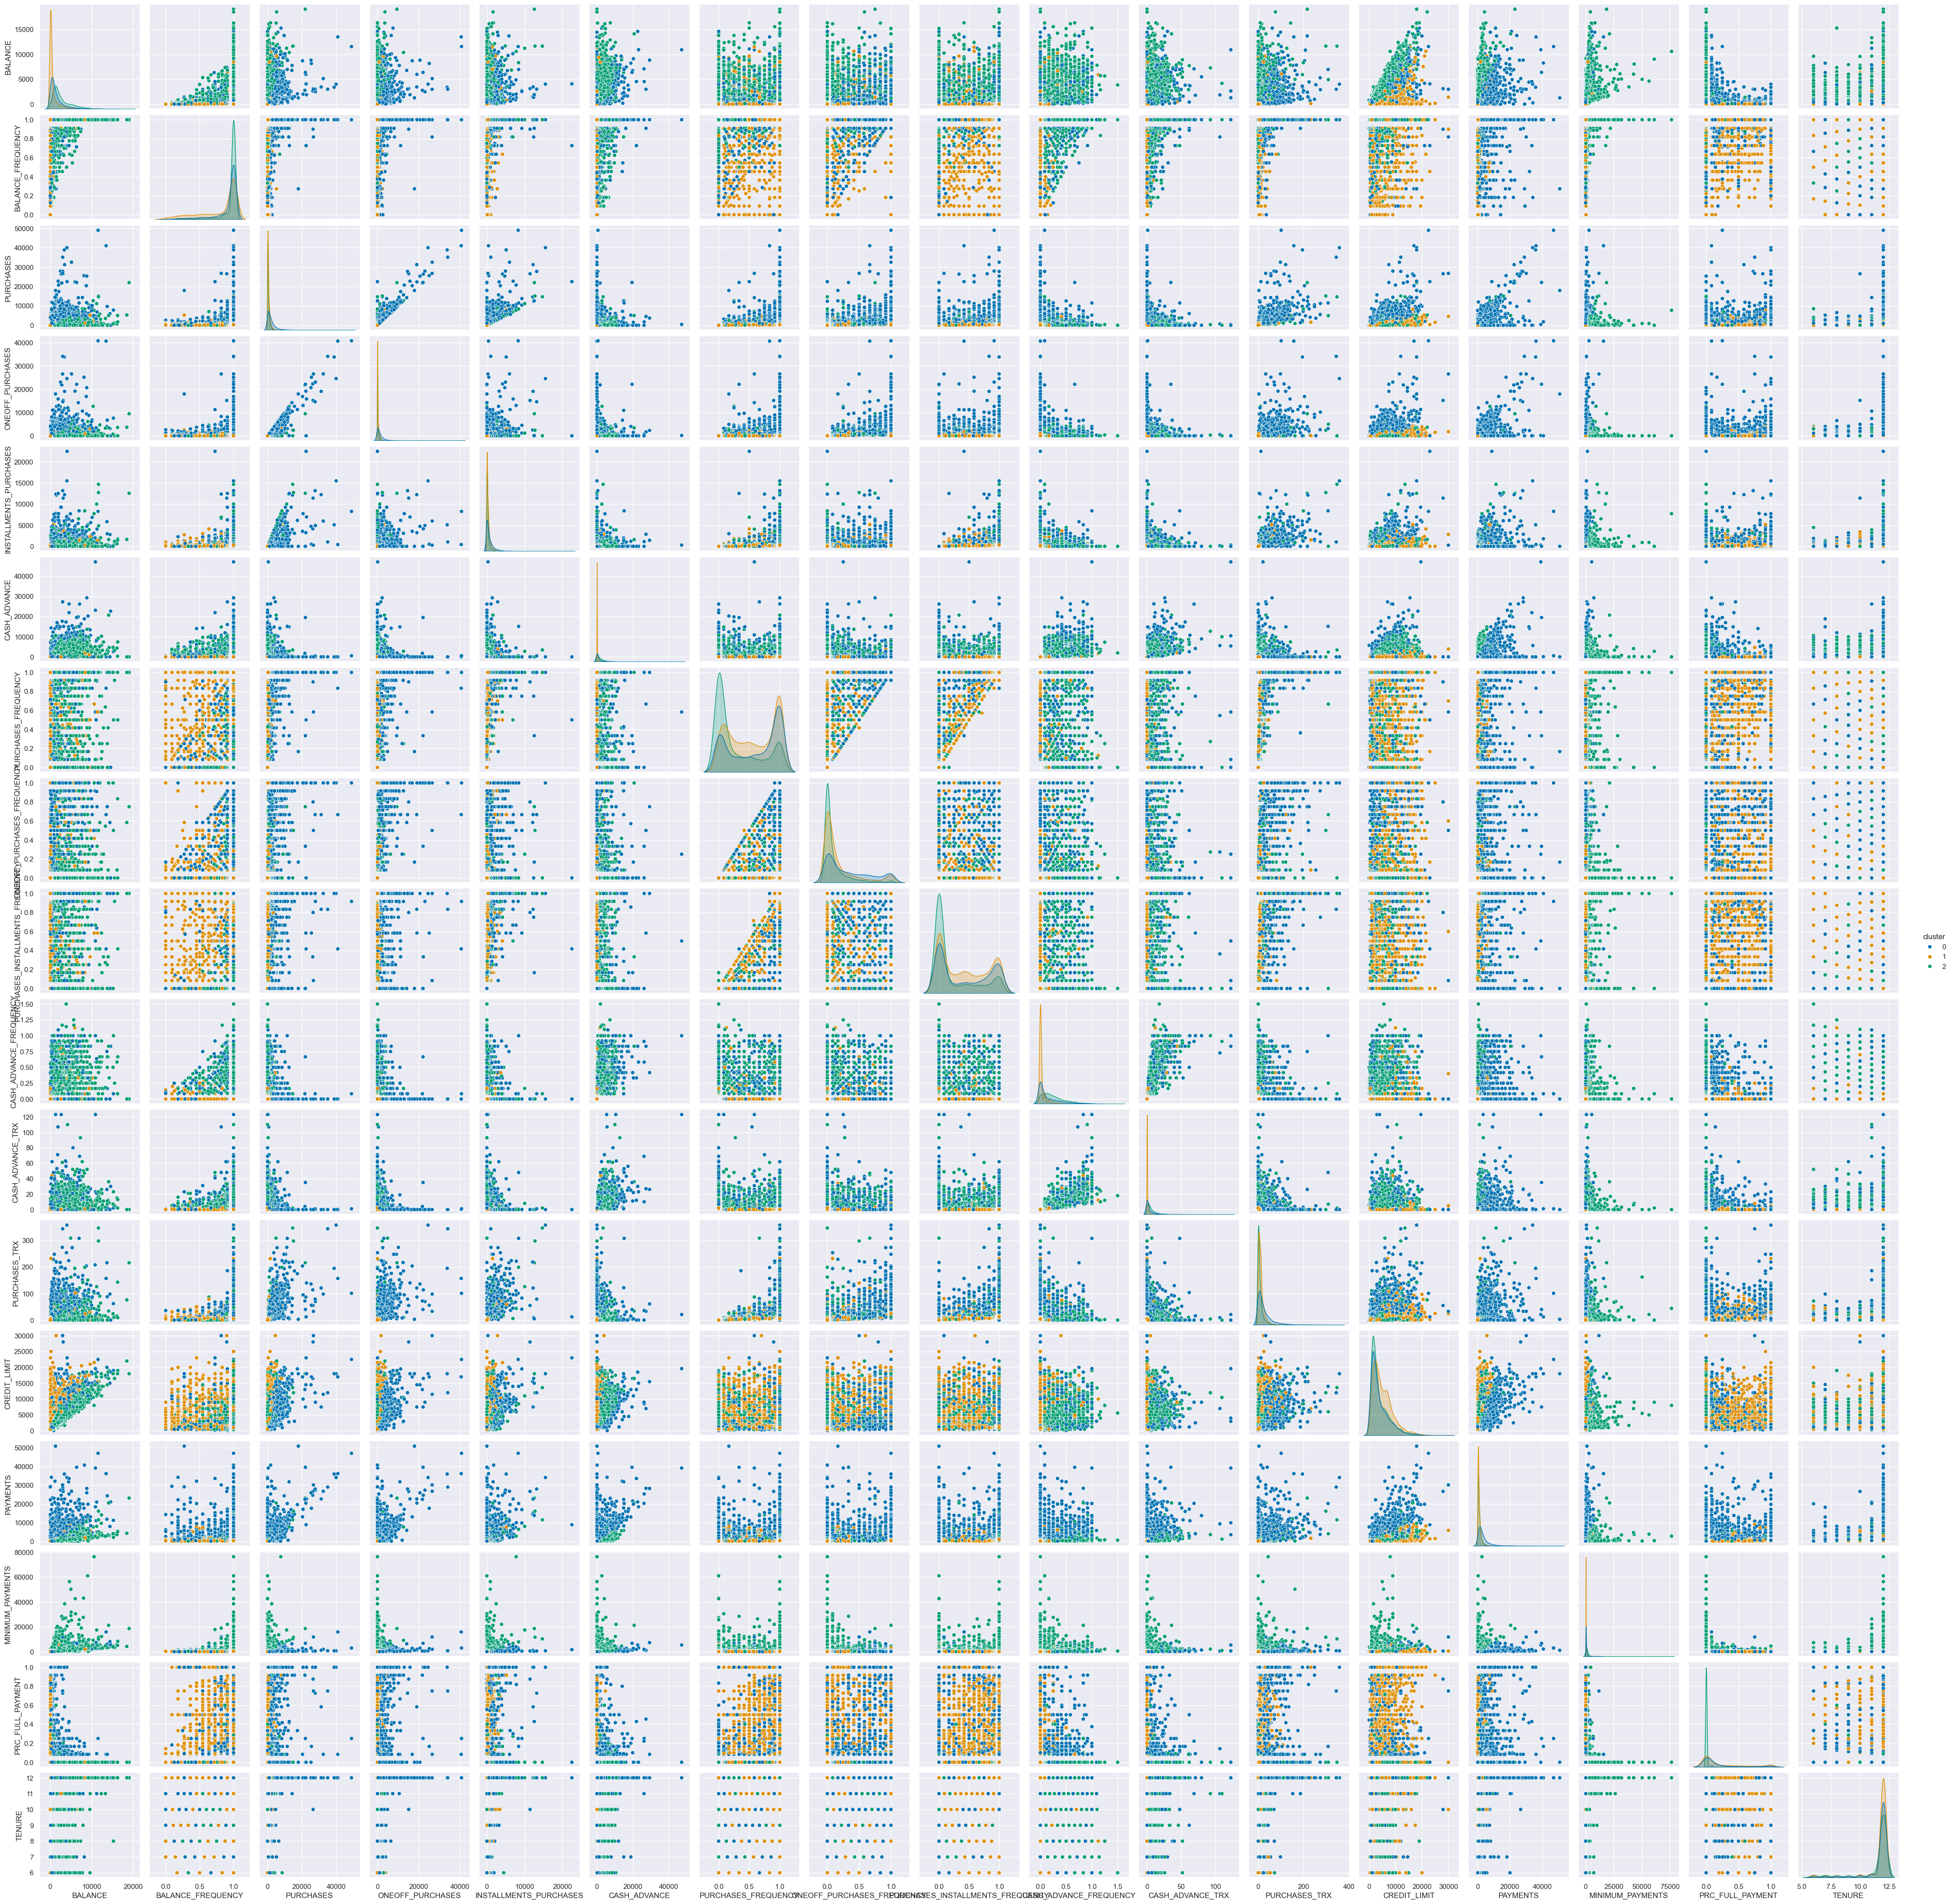

In [44]:
sns.pairplot(data,hue='cluster',palette='colorblind')

# Modelling

In [47]:
x = data_scaled
y = data['cluster']

X_train, X_test, y_train, y_test = train_test_split(x , y, test_size = 0.2, random_state = 42)

## Model Building

In [49]:
def train_and_evaluate(model,X_train, y_train, X_test, y_test):
    # training the model
    model.fit(X_train, y_train)

    # predicting test data and evaluate the scores
    y_pred_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)*100
    precision = precision_score(y_test, y_pred_test, average=None)
    recall = recall_score(y_test, y_pred_test, average=None)
    
    # evaluating train data scores for checking overfitting
    y_pred_train = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)*100

    print('Accuracy for test is', accuracy_test)
    print('Accuracy for train is', accuracy_train)
    print('Precision is', precision)
    print('Recall is', recall)

In [50]:
random_forest_model = RandomForestClassifier() 
train_and_evaluate(random_forest_model, X_train, y_train, X_test, y_test)

Accuracy for test is 97.20670391061452
Accuracy for train is 100.0
Precision is [0.96635514 0.98636364 0.96134454]
Recall is [0.95918367 0.97601199 0.97945205]


## One Versus One Classifier

In [51]:
one_vs_one_model = OneVsOneClassifier(random_forest_model)
# Fit the model on the training data
one_vs_one_model.fit(X_train, y_train)

OneVsOneClassifier(estimator=RandomForestClassifier())

In [55]:
y_scores = one_vs_one_model.decision_function(X_test)
y_binary = np.zeros((len(y_test), len(np.unique(y))))

for i, label in enumerate(np.unique(y)):
    y_binary[:, i] = (y_test == label).astype(int)

In [56]:
# Calculate the AUC for each class
auc_scores = []
for i in range(len(np.unique(y))):
    auc = roc_auc_score(y_binary[:, i], y_scores[:, i])
    auc_scores.append(auc)

In [61]:
generalized_auc = np.mean(auc_scores)
generalized_auc

0.9977889022676631

In [62]:
Gini = (generalized_auc * 2) - 1
Gini

0.9955778045353263

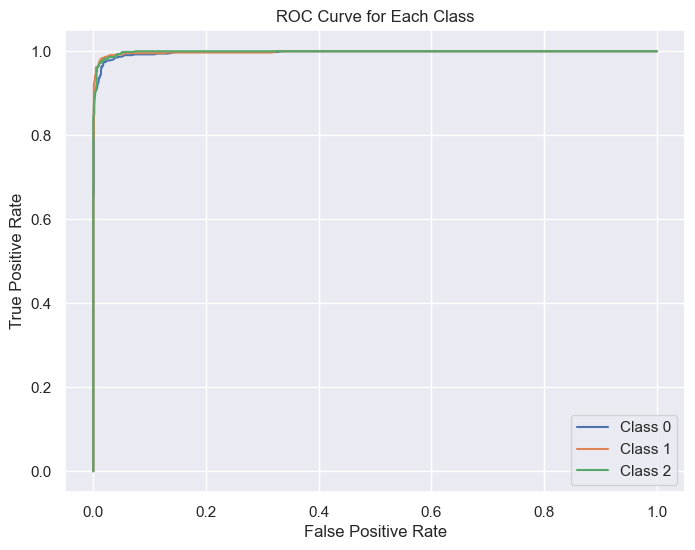

In [63]:
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    fpr, tpr, _ = roc_curve(y_binary[:, i], y_scores[:, i])
    plt.plot(fpr, tpr, label=f'Class {i}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend()
plt.show()